## CLASSWORK 7 - TEXT CLASSIFICATION

Text classification, a vital task in natural language processing, involves categorizing textual data into predefined classes or categories based on their content. Through techniques like machine learning and deep learning, it enables automated analysis of large volumes of text, facilitating tasks such as sentiment analysis, spam detection, and topic categorization.

### READING CSV FILE

In [2]:
# Load, clean, and display data using pandas.

import pandas as pd
 
df = pd.read_csv('eclipse_jdt.csv')  
df = df.drop(columns=['Duplicated_issue'])
df.head()

,Issue_id,Priority,Component,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,1518,P1,Debug,Icons needed for actions (1GI5UXW),JGS (8/8/01 5:20:19 PM); \tWe need enabled; di...,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2001-10-18 11:51:14 -0400
1,1519,P3,Debug,README: Hit count not reset (1GET20Y),JGS (6/4/01 11:43:47 AM); \tSet a breakpoint i...,RESOLVED,WORKSFORME,2.0,2001-10-10 22:14:00 -0400,2001-11-28 13:42:46 -0500
2,1520,P3,Debug,Use styled text in console (1G9S1YF),DW (2/26/01 5:56:36 PM); \tCould allow users t...,CLOSED,WONTFIX,2.0,2001-10-10 22:14:00 -0400,2002-06-26 11:32:05 -0400
3,1521,P3,Debug,StringBuffer representation (1GE3BFA),JGS (5/21/01 2:09:10 PM); \tTo be consistent; ...,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2002-02-05 10:37:09 -0500
4,1522,P2,Debug,Feature: use #toString to display variable val...,DW (9/27/00 11:12:31 AM); \tCurrently; the typ...,RESOLVED,DUPLICATE,2.0,2001-10-10 22:14:00 -0400,2001-10-17 10:17:47 -0400


### DATA VISUALIZATION

<Axes: xlabel='Priority'>

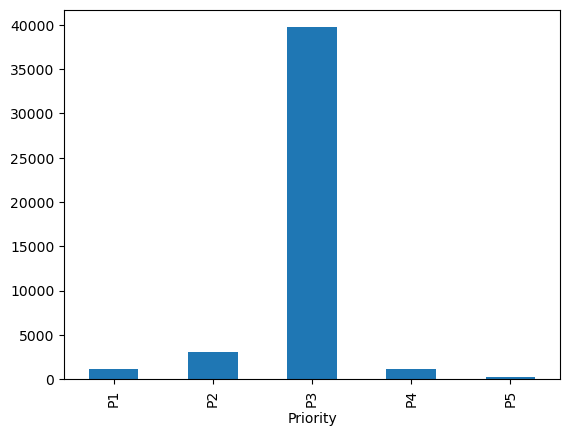

In [3]:
# Plot the distribution of 'Priority' values in a bar chart.

df['Priority'].value_counts().sort_index().plot(kind='bar')

### COMPONENT DISTRIBUTION

<Axes: xlabel='Component'>

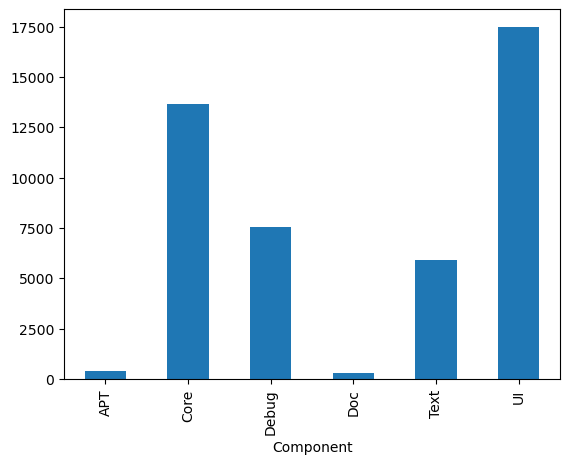

In [4]:
# Plot the distribution of 'Component' values in a bar chart.

df['Component'].value_counts().sort_index().plot(kind='bar')

### TEXT CLEANING FUNCTION

In [5]:
# Define a function to clean text by removing HTML entities, tags, markdown URLs, and unnecessary characters.

import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

### DATAFRAME TRANSFORMATION

In [6]:
# Select relevant columns, concatenate them, clean the text, and filter the entries.

df = df[['Title','Description','Priority']]
df = df.dropna()
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description']) 
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
df.sample(2)

,Priority,text
20698,P3,Content / Code assist I am using; ; Version: 3...
28700,P3,code assist should work even if return type of...


### DATA SPLITTING

In [7]:
# Split the dataset into training and test sets, stratifying by 'Priority'.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


### CONVERTING X_TRAIN TO NUMBERS

In [8]:
# Using TDIDF vectorization to convert text data into numerical features

from sklearn. feature_extraction.text import TfidfVectorizer 
from sklearn.svm import SVC

tfidf = TfidfVectorizer (min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf. fit_transform(X_train)
X_test_tf = tfidf. transform(X_test)

### MODEL TRAINING

This code snippet demonstrates the training of a Linear Support Vector Classifier (LinearSVC) using the TF-IDF transformed training data (X_train_tf) and corresponding labels (Y_train). The random_state parameter is set to ensure reproducibility, and tol sets the tolerance for stopping criteria.

In [9]:
# Train a Linear Support Vector Classifier on the TF-IDF transformed text data.

from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

/Users/sid/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

### MODEL EVALUATION

This code snippet calculates the accuracy score of a trained model ( mode11) on the test data ( X_test_tf) using the actual labels (Y_test ). It imports the accuracy_score function from sklearn.metrics module and computes the accuracy by comparing the predicted labels (Y_pred) with the actual labels (Y_test ).
Finally, it prints the accuracy score.

In [10]:
# Predict the test set labels and calculate the accuracy of the Linear SVC model.

from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.8761513705471091


### BASELINE MODEL EVALUATION

In [11]:
# Train a baseline model using the most frequent strategy and evaluate its accuracy.

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.8769281988680502


### CONFUSION MATRIX COMPUTATION

In [12]:
# Generate the confusion matrix for the test set predictions of the Linear SVC model.

from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

array([[  19,    1,  199,    4,    0],
       [   6,   18,  576,    8,    0],
       [   8,   48, 7827,   19,    0],
       [   0,    5,  192,   31,    0],
       [   0,    0,   50,    0,    0]])

### VISUALIZE CONFUSION MATRIX

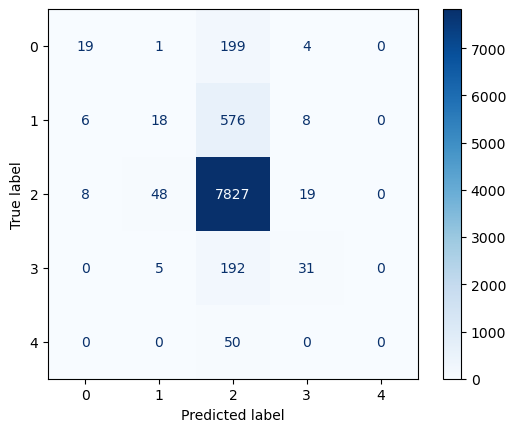

In [13]:
# Plot the confusion matrix for the Linear SVC model predictions, displaying counts in each cell and using a blue color map. 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

predictions = model1.predict(X_test_tf)

conf_matrix = confusion_matrix(Y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix )
disp.plot(cmap=plt.cm.Blues)
plt.show()

### CLASSIFICATION REPORT

This code snippet generates a classification report using the classification report function from the sklearn.metrics module. It provides a comprehensive summary of various classification metrics such as precision, recall, F1-score, and support for each class in the classification task. The report includes metrics for each class as well as the macro and weighted averages across all classes.

In [14]:
# Generate a detailed classification report for the Linear SVC model predictions, including precision, recall, f1-score, and support.

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred)) 

              precision    recall  f1-score   support

          P1       0.58      0.09      0.15       223
          P2       0.25      0.03      0.05       608
          P3       0.89      0.99      0.93      7902
          P4       0.50      0.14      0.21       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.88      9011
   macro avg       0.44      0.25      0.27      9011
weighted avg       0.82      0.88      0.83      9011



/Users/sid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### BALANCING DATASET

This code balances the dataset by sampling 4000 bug reports with priority 'P3' and combining them with bug reports of other priorities, thus addressing the class imbalance issue.

In [15]:
# Balance the dataset by sampling from the 'P3' priority class and concatenating with the rest.

# Filter bug reports with priority P3 and sample 4000 rows from it
df_sampleP3 = df[df['Priority'] == 'P3'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Priority'] != 'P3']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Priority'].value_counts()

Priority
P3    4000
P2    3038
P4    1138
P1    1117
P5     252
Name: count, dtype: int64

### DATA PREPROCESSING AND SPLITTING

In [16]:
# Clean the text data, then split it into training and test sets, ensuring stratification by 'Priority'.

# Loading the balanced dataframe

df = df_balanced[['text', 'Priority']]
df = df.dropna()

# Step 1 - Data Preparation

df['text'] = df['text'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])


Size of Training Data  7636
Size of Test Data  1909


### MODEL TRAINING AND EVALUATION

In [17]:
# Train a Linear SVC model using TF-IDF features and evaluate its performance with accuracy and a classification report. 

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

/Users/sid/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score -  0.5028810895756941
              precision    recall  f1-score   support

          P1       0.44      0.29      0.35       223
          P2       0.45      0.48      0.46       608
          P3       0.56      0.66      0.60       800
          P4       0.47      0.34      0.39       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.50      1909
   macro avg       0.38      0.35      0.36      1909
weighted avg       0.48      0.50      0.49      1909



### DATA PREPROCESSING AND SETUP

In [18]:
# Prepare and split the dataset, optionally sampling for SVC, to facilitate model training and evaluation.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Flag that determines the choice of SVC (True) and LinearSVC (False)

runSVC = True
# Loading the dataframe

df = pd.read_csv('eclipse_jdt.csv')
df = df.drop(columns=['Duplicated_issue'])
df = df[['Title', 'Description', 'Component']]
df = df.dropna()
df['text'] = df['Title'] + df['Description']
df = df.drop(columns=['Title', 'Description'])

# Step 1 - Data Preparation

df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
if (runSVC):
    
    # Sample the data when running SVC to ensure reasonable run-times
    
    df = df.groupby('Component', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split

X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Component'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Component'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  7208
Size of Test Data  1802


### MODEL TRAINING AND HYPERPARAMETER TUNING

In [ ]:
# Configure and execute a grid search to find the best model parameters, then evaluate the model's performance.

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))